In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/users-vs-bots-classification/bots_vs_users.csv


In [2]:
df = pd.read_csv("/kaggle/input/users-vs-bots-classification/bots_vs_users.csv")
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown


In [3]:
df.isna().sum()

has_domain                       0
has_birth_date                   0
has_photo                        0
can_post_on_wall                 0
can_send_message                 0
has_website                      0
gender                           0
has_short_name                   0
has_first_name                   0
has_last_name                    0
access_to_closed_profile         0
is_profile_closed                0
target                           0
has_nickname                     0
has_maiden_name                  0
has_mobile                       0
all_posts_visible                0
audio_available                  0
has_interests                    0
has_books                        0
has_tv                           0
has_quotes                       0
has_about                        0
has_games                        0
has_movies                       0
has_activities                   0
has_music                        0
can_add_as_friend                0
can_invite_to_group 

In [4]:
df["city"]= df["city"].replace("<NA>", -1)
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,1.0,1.0,1.0,0.0,0.0,Unknown,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,0.0,1.0,Unknown
5870,1.0,Unknown,1.0,0.0,0.0,Unknown,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,1.0,0.0,Unknown
5871,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,1.0,0.0,Unknown
5872,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Moscow,1.0,0.0,1.0,Unknown


In [5]:
df.shape

(5874, 60)

In [6]:
df = df.drop(columns=["posts_count","avg_likes", "avg_text_uniqueness" , "phone_numbers_ratio", 
                     
                     "posting_frequency_days", "avg_views", "ads_ratio", "reposts_ratio", "attachments_ratio",
                     "avg_comments", "avg_text_length", "avg_keywords", "hashtags_ratio", "links_ratio"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   has_domain                  5874 non-null   object
 1   has_birth_date              5874 non-null   object
 2   has_photo                   5874 non-null   object
 3   can_post_on_wall            5874 non-null   object
 4   can_send_message            5874 non-null   object
 5   has_website                 5874 non-null   object
 6   gender                      5874 non-null   object
 7   has_short_name              5874 non-null   object
 8   has_first_name              5874 non-null   object
 9   has_last_name               5874 non-null   object
 10  access_to_closed_profile    5874 non-null   object
 11  is_profile_closed           5874 non-null   object
 12  target                      5874 non-null   int64 
 13  has_nickname                5874 non-null   obje

In [7]:
df = df.replace("Unknown", -1)

In [8]:
df.head()

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,has_schools,has_relatives,is_verified,is_confirmed,has_status,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [9]:
y = df["target"]
X = df.drop(columns="target", axis=1)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   has_domain                  5874 non-null   object
 1   has_birth_date              5874 non-null   object
 2   has_photo                   5874 non-null   object
 3   can_post_on_wall            5874 non-null   object
 4   can_send_message            5874 non-null   object
 5   has_website                 5874 non-null   object
 6   gender                      5874 non-null   object
 7   has_short_name              5874 non-null   object
 8   has_first_name              5874 non-null   object
 9   has_last_name               5874 non-null   object
 10  access_to_closed_profile    5874 non-null   object
 11  is_profile_closed           5874 non-null   object
 12  has_nickname                5874 non-null   object
 13  has_maiden_name             5874 non-null   obje

In [11]:
for col in X.select_dtypes(include="object").columns:
    X[col] = pd.to_numeric(X[col], errors='coerce').astype('Int64')
    

In [12]:
X.shape, y.shape

((5874, 45), (5874,))

In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y, random_state=42)
xgb  = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, 
                        n_jobs=-1, objective="binary:logistic")
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [14]:
y_pred = xgb.predict(X_test)
xgb.score(X_train, y_train)

0.9775255391600454

In [15]:
xgb.score(X_test, y_test)

0.9693669162695712

In [16]:
y_pred = xgb.predict(X_test)

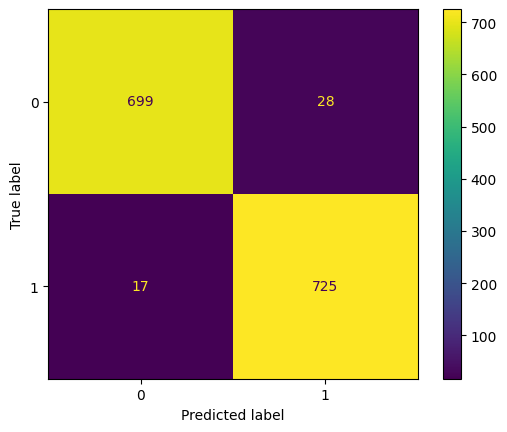

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
cm = confusion_matrix(y_test,y_pred )
ConfusionMatrixDisplay(cm).plot()

roc-auc-score : 0.9695361941433521


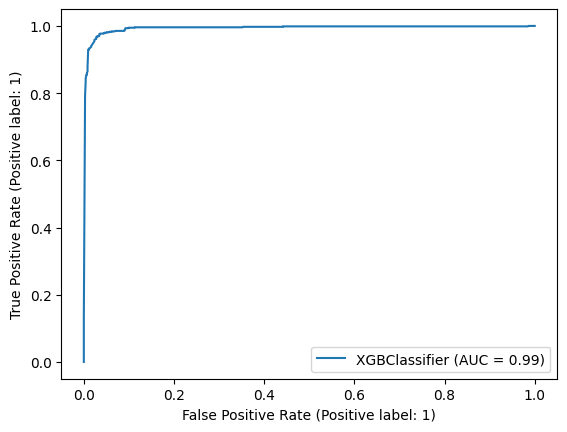

In [18]:
ra = roc_auc_score(y_pred, y_test)
print(f"roc-auc-score : {ra}")
RocCurveDisplay.from_estimator(xgb, X_test, y_test)